In [73]:
import gurobipy as gp
import pandas as pd
import numpy as np
from gurobipy import GRB
import importlib
import matplotlib.pyplot as plt
import matplotlib

In [76]:
import sys
sys.path.append('/Users/boosman/Documents/2_Econometrie/Master/Thesis/Network_Decomposition')

from Device import CHP, Generator, Renewable, TransmissionLine, ThermalLoad, FixedLoad, FixedLoadTest, Storage, PowerDissipation, HeatDissipation
from Connection import EConnection, HConnection
from Network import Network, ThermalNetwork



In [77]:
import Device
import Connection
import Network
import importlib
importlib.reload(Device)
importlib.reload(Connection)
importlib.reload(Network)
from Connection import EConnection, HConnection
from Network import Network, ThermalNetwork
from Device import CHP, Generator, Renewable, TransmissionLine, ThermalLoad, FixedLoad, FixedLoadTest, Storage, PowerDissipation, HeatDissipation


# Benchmark

In [88]:
#initiate the model and the time vector

T = list(range(8760))

##############################
# NET 1 Devices: 
LE_hh_1= FixedLoad(T,   'Households' , 30000)
LE_wc_1= FixedLoad(T,  'Weighted_Commercial' , 35000)
G_1 = Generator(T,   power_max=12, power_min=0, ramp_min = -1, ramp_max = 1, operating_point = 3, alpha=1, beta=40, gamma = 1)
PD_1 = PowerDissipation(T)

##############################
# NET 2 Devices: 
LE_hh_2= FixedLoad(T,  'Households' , 5000)
PD_2 = PowerDissipation(T)


##############################
# NET 3 Devices: 
LE_m_3= FixedLoad(T,   'Manufacturing' , 20000)
B_3    = Storage(T,  discharge_max = 3, charge_max = 3, energy_max = 60)
PD_3 = PowerDissipation(T)


##############################
# NET 4 Devices: 
B_4    = Storage(T,  discharge_max = 2, charge_max = 2, energy_max = 30)
LE_hh_4= FixedLoad(T,  'Households' , 6000)
PD_4 = PowerDissipation(T)


##############################
# NET 5 Devices: 
G_5 = Generator(T,   power_max=20, power_min=0, ramp_min = -1, ramp_max = 1, operating_point = 4, alpha=0.4, beta=35, gamma = 1)
PV_5 = Renewable(T,  technology  = 'PV', install_cap = 7)
PD_5 = PowerDissipation(T)


##############################
# NET 6 Devices: 
PV_6 = Renewable(T,  technology  = 'PV', install_cap = 6)
W_6 = Renewable(T,  technology  = 'Wind', install_cap = 9)
PD_6 = PowerDissipation(T)

##############################
# NET 7 Devices: 
LE_wc_7= FixedLoad(T,  'Weighted_Commercial' , 4000)
LE_m_7= FixedLoad(T,  'Manufacturing' , 5000)
PD_7 = PowerDissipation(T)


##############################
# NET 8 Devices: 
LE_hh_8= FixedLoad(T,  'Households' , 10000)
LE_wc_8= FixedLoad(T,  'Weighted_Commercial' , 4000)
PV_8 = Renewable(T,  technology  = 'PV', install_cap = 2)
PD_8 = PowerDissipation(T)

##############################
# NET 9 Devices: 
W_9 = Renewable(T,  technology  = 'Wind', install_cap = 3)
LE_m_9= FixedLoad(T,  'Manufacturing' , 45000)
PD_9 = PowerDissipation(T)


##############################
# NET 10 Devices: 
G_10 = Generator(T,   power_max=8, power_min=0, ramp_min = -0.1, ramp_max = 0.1, operating_point = 4, alpha=1.5, beta=55, gamma = 1)
LE_hh_10= FixedLoad(T,  'Households' , 20000)
LE_wc_10= FixedLoad(T,  'Weighted_Commercial' , 25000)
PD_10 = PowerDissipation(T)


############### Transmission Lines
T1 = TransmissionLine(T, power_max=5)
T2 = TransmissionLine(T, power_max=5)
T3 = TransmissionLine(T, power_max=5)
T4 = TransmissionLine(T, power_max=5)
T5 = TransmissionLine(T, power_max=5)
T6 = TransmissionLine(T, power_max=5)
T7 = TransmissionLine(T, power_max=5)
T8 = TransmissionLine(T, power_max=5)
T9 = TransmissionLine(T, power_max=5)
T10= TransmissionLine(T, power_max=5)
T11 = TransmissionLine(T, power_max=5)
T12 = TransmissionLine(T, power_max=5)

transmisions = [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12]

##############################
devices = all_devices = [
    # NET 1 Devices
    LE_hh_1, LE_wc_1, G_1, PD_1,
    # NET 2 Devices
    LE_hh_2, PD_2,
    # NET 3 Devices
    LE_m_3, B_3, PD_3,
    # NET 4 Devices
    B_4, LE_hh_4, PD_4,
    # NET 5 Devices
    G_5, PV_5, PD_5,
    # NET 6 Devices
    PV_6, W_6, PD_6,
    # NET 7 Devices
    LE_wc_7, LE_m_7, PD_7,
    # NET 8 Devices
    LE_hh_8, LE_wc_8, PV_8, PD_8,
    # NET 9 Devices
    W_9, LE_m_9, PD_9,
    # NET 10 Devices
    G_10, LE_hh_10, LE_wc_10, PD_10
] + transmisions

N1 = Network(T, [PD_1.Econnections[0], LE_hh_1.Econnections[0], LE_wc_1.Econnections[0], G_1.Econnections[0], T1.Econnections[0], T2.Econnections[0]])
N2 = Network(T, [PD_2.Econnections[0], LE_hh_2.Econnections[0], T2.Econnections[1], T3.Econnections[0]])
N3 = Network(T, [PD_3.Econnections[0], LE_m_3.Econnections[0], B_3.Econnections[0], T4.Econnections[0], T5.Econnections[0]])
N4 = Network(T, [PD_4.Econnections[0], LE_hh_4.Econnections[0], B_4.Econnections[0], T1.Econnections[1], T6.Econnections[0]])
N5 = Network(T, [PD_5.Econnections[0], G_5.Econnections[0], PV_5.Econnections[0], T3.Econnections[1], T4.Econnections[1], T7.Econnections[0]])
N6 = Network(T, [PD_6.Econnections[0], PV_6.Econnections[0], W_6.Econnections[0], T8.Econnections[0], T9.Econnections[0]])
N7 = Network(T, [PD_7.Econnections[0], LE_wc_7.Econnections[0], LE_m_7.Econnections[0], T6.Econnections[1], T7.Econnections[1], T9.Econnections[1], T10.Econnections[0], T11.Econnections[0]])
N8 = Network(T, [PD_8.Econnections[0], LE_hh_8.Econnections[0], LE_wc_8.Econnections[0], PV_8.Econnections[0], T5.Econnections[1], T12.Econnections[0]])
N9 = Network(T, [PD_9.Econnections[0], W_9.Econnections[0], LE_m_9.Econnections[0], T8.Econnections[1], T10.Econnections[1]])
N10 = Network(T,[PD_10.Econnections[0], G_10.Econnections[0], LE_hh_10.Econnections[0], LE_wc_10.Econnections[0], T11.Econnections[1], T12.Econnections[1]])

nets = [N1, N2, N3, N4, N5, N6,N7,N8,N9,N10]
all_lines  = [line for n in nets for line in n.Econnections]


In [ ]:
## Implement ADMM
max_iter = 1000
epsilon = 0.1
for k in range(max_iter):
    print(k)
    convergence = True
    # 1. Nodal optimization (parallel)
    for device in devices:
        if hasattr(device, '_updateObjective'):
            device._updateObjective()
        device.optimize() 
        # print(f"Power flow on the terminal {device.Econnections[0].powerValues}")

    # 2. Line update of duals (parallel)
    for net in nets:
        net.updateBalance()
        net.updateDual()
        if all(abs(x) < epsilon for x in net.balance):
            pass
        else:
            convergence = False 
        # print(f"{terminal.name} DUAL: {terminal.dual}")
        # print(f"{terminal.name} BALANCE: {terminal.balance}")
    if convergence:
        print(f"CONVERGENCE in iteration{k}")
        break

    #3. uppdate the penalty per terminal and update the objective of the nodes
    for line in all_lines:
        line.set_prev_power()
        line.updatePenalty() 


In [76]:
def average(lst):
    return sum(lst) / len(lst)

def printDuals(nets):
    i=1
    for n in nets:
        print(f"Net {i} - avg Dual: {average(n.dual)}")
        i +=1
        

In [78]:
N5.dual

[4.073131359760402,
 3.9032399315711293,
 3.830336994494479,
 3.8029839372790497,
 3.877431483412993,
 3.378894720663976,
 4.365230318987598,
 4.308987912413666,
 4.356182889135957,
 4.302822451629289,
 4.192658359020762,
 4.088106666534815,
 4.0354666508031185,
 3.9593066814088167,
 3.957787126861931,
 4.18270901905658,
 4.205427051005535,
 4.214814461732296,
 4.2425876805088425,
 4.207125838916704,
 4.317518532807586,
 4.290205707863475,
 4.322790800084291,
 4.331531079449358,
 4.120627361048464,
 2.0573347136011755,
 3.6686467468648343,
 2.451935998721633,
 3.1171232153993693,
 4.014717763755767,
 4.377458182555564,
 4.496808690750845,
 4.745492027962129,
 4.756688375283341,
 4.067386669268711,
 3.9962666648703804,
 3.9845066666491706,
 3.9772266659565774,
 3.999966915663023,
 4.146928090091817,
 4.188156288850604,
 4.2299767181930115,
 4.229977391704398,
 4.203688922676949,
 4.188723405615287,
 4.205359867903067,
 4.213064681710411,
 4.226702876883586,
 4.198463067739085,
 4.086101

In [5]:
m.optimize()
if m.status == GRB.OPTIMAL:
    print("Optimal solution found.")
elif m.status == GRB.INFEASIBLE:
    print("Model is infeasible.")
elif m.status == GRB.UNBOUNDED:
    print("Model is unbounded.")
elif m.status == GRB.INF_OR_UNBD:
    print("Model is either infeasible or unbounded.")
else:
    print("Optimization was stopped with status", m.status)



In [6]:
l1= FixedLoad(T, 'Weighted_Commercial' ,10000)
l2= FixedLoad(T, 'Households' ,10000)
l3= FixedLoad(T, 'Manufacturing' ,10000)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-23


In [185]:
p1 = l1.determineLoadProfile()
p2 = l2.determineLoadProfile()
p3 = l3.determineLoadProfile()

In [192]:
T2 = T[480:(168+480)]

In [183]:
sum

999.9999999999925

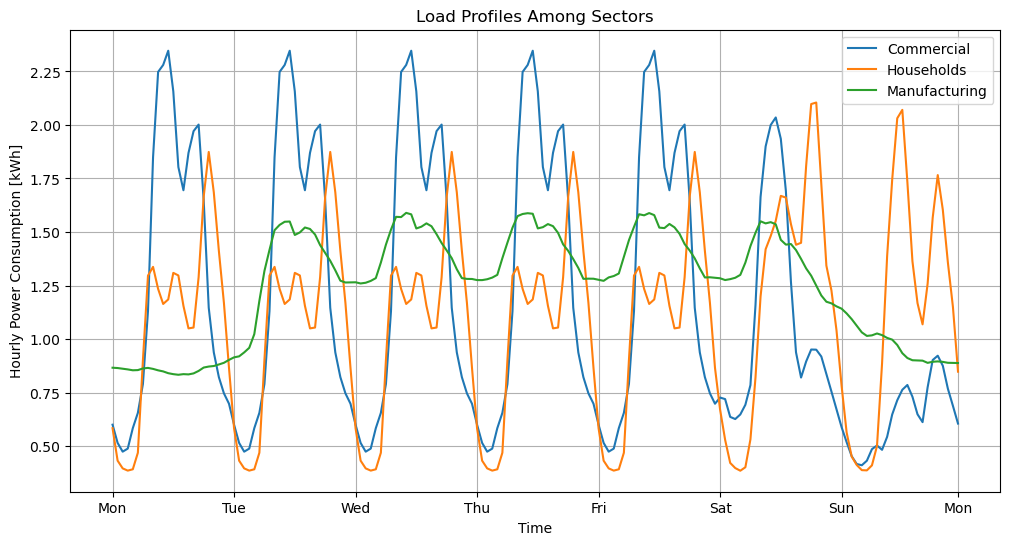

In [196]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(T2, p1[480:(168+480)], label='Commercial')
plt.plot(T2, p2[480:(168+480)], label='Households')
plt.plot(T2, p3[480:(168+480)], label='Manufacturing')

# Title
plt.title('Load Profiles Among Sectors')

# X-axis labels
plt.xlabel('Time')
plt.xticks(ticks=[480, 480+24, 480+48, 480+72, 480+96, 480+120, 480+144, 480+167], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'])

# Y-axis label
plt.ylabel('Hourly Power Consumption [kWh]')

# Add grid
plt.grid(True)

# Legend
plt.legend()

# Display the plot
plt.savefig('load_profiles_among_sectors.png')

plt.show()


In [198]:
K = [[10] for x in range(5+1)] 
K

[[10], [10], [10], [10], [10], [10]]

In [38]:
T = list(range(100))
p_load = np.sin(np.pi*np.arange(100)/100)
# load = FixedLoadTest(T = T, power=np.matrix(p_load).T)
load = FixedLoadTest(T = T, power=p_load)

gen = Generator(T, power_max=2, power_min=0, alpha=100, beta=100)
storage = Storage(T, discharge_max=0.4, charge_max=0.1, energy_max=2)
net = Network([load.Econnections[0], gen.Econnections[0], storage.Econnections[0]], len(T))
nets = [net]
devices = [load, gen, storage]
all_lines  = [line for n in nets for line in n.Econnections]


In [8]:
# T=[0]
# load = FixedLoadTest(T = T, power=[100])
# gen1 = Generator(T,power_max=1000, power_min = 0, alpha=0.01, beta=100, name="Gen1")
# gen2 = Generator(T,power_max=100, power_min = 0, alpha=0.1, beta=0.1, name="Gen2")
# l = TransmissionLine(T, power_max=50)

# net1 = Network([load.Econnections[0], gen1.Econnections[0], l.Econnections[0]], len(T))
# net2 = Network([gen2.Econnections[0], l.Econnections[1]],len(T))
# nets = [net1,net2]
# devices = [load,gen1, gen2, l]
# all_lines  = [line for n in nets for line in n.Econnections]


# Rho demonstration


In [78]:
T=[0]
load1 = FixedLoadTest(T=T,power=[50])
load2 = FixedLoadTest(T=T,power=[100])
gen1 = Generator(T,power_max=200, operating_point = 2, power_min = 0,  alpha=0.02, beta=30, name="Gen1")
gen2 = Generator(T,power_max=100, operating_point = 2, power_min = 0, alpha=0.2, beta=20, name="Gen2")
# li1 = TransmissionLine(T, power_max=51)
li2 = TransmissionLine(T, power_max=51)
# li3 = TransmissionLine(T, power_max=51)

net1 = Network(T, [load1.Econnections[0], gen1.Econnections[0],  li2.Econnections[0]])#li1.Econnections[0],
# net2 = Network(T, [load2.Econnections[0], li1.Econnections[1], li3.Econnections[0]])
net3 = Network(T, [gen2.Econnections[0], li2.Econnections[1],]) # li3.Econnections[1]
# nets = [net1,net2, net3]
nets = [net1, net3]
devices = [load1,load2,gen1, gen2, li2] #li1,li3,
all_lines  = [line for n in nets for line in n.Econnections]

## Implement ADMM
max_iter = 1000
epsilon = 0.001
duals = {net: {} for net in nets}
for k in range(max_iter):
    print(k) 
    convergence = True
    # 1. Nodal optimization (parallel)
    for device in devices:
        if hasattr(device, '_updateObjective'):
            device._updateObjective()
        device.optimize() 
        # print(f"Power flow on the terminal {device.Econnections[0].powerValues}")

    # 2. Line update of duals (parallel)
    for net in nets:
        net.updateBalance()
        net.updateDual()
        duals[net][k]= net.dual[0] * 10
        if all(abs(x) < epsilon for x in net.balance):
            pass
        else:
            convergence = False 
        # print(f"{terminal.name} DUAL: {terminal.dual}")
        # print(f"{terminal.name} BALANCE: {terminal.balance}")
    if convergence:
        print(f"CONVERGENCE in iteration{k}")
        break

    #3. uppdate the penalty per terminal and update the objective of the nodes
    for line in all_lines:
        line.set_prev_power()
        line.updatePenalty() 



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
CONVERGENCE in iteration128


In [21]:
nets

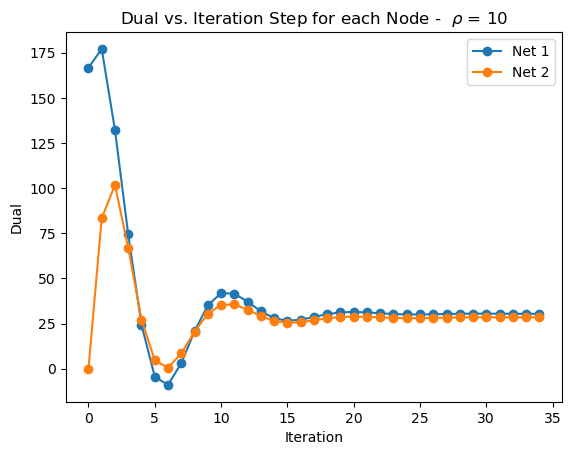

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot each key's data
i=1
for key, value_dict in duals.items():
    time_steps = list(value_dict.keys())[0:35]
    values = list(value_dict.values())[0:35]
    ax.plot(time_steps, values, marker='o', label=f"Net {i}")
    i+=1
# Add labels and legend
ax.set_xlabel('Iteration')
ax.set_ylabel('Dual')
ax.set_title('Dual vs. Iteration Step for each Node -  $\\rho$ = 10')
ax.legend()
plt.savefig('rho_10.png')
# Show the plot

In [32]:
duals

{<Network.Network at 0x15798ec50>: {0: 1666.6666666666667,
  1: 1677.1335910632597,
  2: 1132.2656982157457,
  3: 449.6534962973822,
  4: -121.12782214805371,
  5: -420.72024735088826,
  6: -434.2745055232978,
  7: -263.63715030424817,
  8: -45.34529785867512,
  9: 117.74968611460442,
  10: 184.03107906108596,
  11: 165.4104801054174,
  12: 101.90163669629865,
  13: 35.3172588316397,
  14: -7.515795652762142,
  15: -19.286216449172166,
  16: -7.469049621533015,
  17: 14.267705137234282,
  18: 33.71984214918813,
  19: 44.28054803177775,
  20: 45.32075021788271,
  21: 40.12057454362337,
  22: 33.09511916832143,
  23: 27.655610802455495,
  24: 25.283921436745967,
  25: 25.707772309112396,
  26: 27.683672387569867,
  27: 29.85118019108836,
  28: 31.30197142992559,
  29: 31.754830413493067,
  30: 31.42151819272098,
  31: 30.73466318468213,
  32: 30.095791418210847,
  33: 29.732735918603222,
  34: 29.67904977078909},
 <Network.Network at 0x157ff9090>: {0: 0.0,
  1: 833.3333332505056,
  2: 85

In [103]:
li3.totalPayment()

-0.035394551005595076

In [104]:
print(li1.Econnections[0].powerValues)
print(li1.Econnections[1].powerValues)
print(li2.Econnections[0].powerValues)
print(li2.Econnections[1].powerValues)
print(li3.Econnections[0].powerValues)
print(li3.Econnections[1].powerValues)

[49.000129682211735]
[-49.000129682211735]
[-30.78708901244589]
[30.787089012445875]
[-50.99986303813973]
[50.99986303813972]


In [105]:
print(net1.dual)
print(net2.dual)
print(net3.dual)
print(gen1.Econnections[0].powerValues)
print(gen2.Econnections[0].powerValues)

[3.2725095221256666]
[3.272513889457005]
[3.2718198767891846]
[-68.21303104594736]
[-81.78692222560478]


In [52]:
print(load.Econnections[0].powerValues)

[0.0, 0.031410759078127626, 0.06279051952931525, 0.09410831331851455, 0.12533323356430515, 0.15643446504023473, 0.18738131458572127, 0.21814324139654673, 0.24868988716485774, 0.2789911060392285, 0.309016994374943, 0.33873792024529337, 0.3681245526846766, 0.39714789063478406, 0.4257792915650782, 0.45399049973954675, 0.48175367410171077, 0.5090414157503744, 0.5358267949790019, 0.562083377852133, 0.5877852522924769, 0.6129070536529753, 0.6374239897486831, 0.661311865323654, 0.6845471059286865, 0.7071067811865532, 0.7289686274214091, 0.7501110696304636, 0.7705132427757917, 0.790155012375692, 0.809016994374943, 0.8270805742745608, 0.8443279255020144, 0.860742027003937, 0.8763066800438679, 0.89100652418837, 0.9048270524660182, 0.9177546256839832, 0.9297764858882545, 0.94088076895423, 0.9510565162951536, 0.9602936856769446, 0.9685831611286346, 0.9759167619387483, 0.9822872507286888, 0.9876883405951418, 0.9921147013144775, 0.995561964603084, 0.9980267284282718, 0.9995065603657309, 1.0, 0.99950

[-60.00000021823046]

In [ ]:
net1.dual

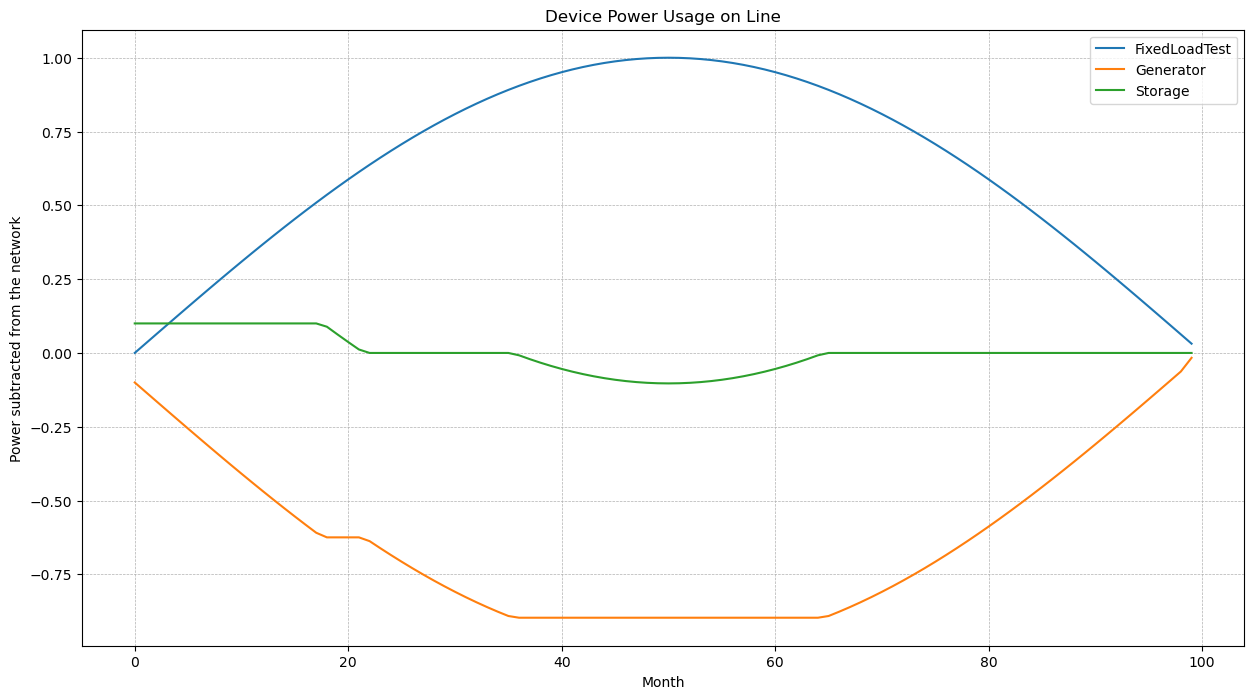

In [22]:
net.plotData()

In [43]:
gen.Econnections[0].powerValues

[0.0]

In [44]:
net.updateBalance()
net.updateDual()

In [119]:
net1 .dual

[10.099178832684727]

In [46]:
net.balance

[0.5]

In [47]:
gen.Econnections[0].set_prev_power()

In [48]:
gen.Econnections[0].updatePenalty()

In [49]:
gen.Econnections[0].penaltyTerm

[-1.0]

In [50]:

load.Econnections[0].updatePenalty()

In [51]:
load.Econnections[0].set_prev_power()

In [52]:
load.Econnections[0].penaltyTerm

[-1.0]

In [53]:
gen.model.update()

In [54]:
gen._updateObjective()

In [31]:
gen.model.getObjective()


<gurobi.QuadExpr: 453750.0 + 1550.0 Electric Connection_Variable[0] + [ 101.5 Electric Connection_Variable[0] ^ 2 ]>

In [56]:
gen.optimize()

In [57]:
gen.Econnections[0].powerValues

[0.0]

In [58]:
gen.Econnections[0].prevPower

[0.0]

In [59]:
gen.model.getConstrs()[1]

<gurobi.Constr R1>

In [30]:
# Access all constraints
constraints = gen.model.getConstrs()

# Print detailed information about each constraint
for constraint in constraints:
    expr = gen.model.getRow(constraint)  # The linear expression of the constraint
    sense = constraint.Sense         # The sense of the constraint (<=, >=, =)
    rhs = constraint.RHS             # The right-hand side value
    name = constraint.ConstrName     # The name of the constraint
    print(f"Constraint {name}: {expr} {sense} {rhs}")


Constraint R0: -1.0 Electric Connection_Variable[0] < 2.0
Constraint R1: -1.0 Electric Connection_Variable[0] > 0.0
Constraint R2: -1.0 Electric Connection_Variable[0] = 0.0


In [90]:
gen.model.getObjective()

<gurobi.LinExpr: 0.0>

In [91]:
gen.model.getObjective()

<gurobi.LinExpr: 0.0>

In [10]:
gen.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.3.0 23D60)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 201 rows, 100 columns and 201 nonzeros
Model fingerprint: 0xe5f2aee0
Model has 100 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 1e+02]
  QObjective range [2e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 2e+00]
Presolve time: 0.01s

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Model is infeasible or unbounded


In [11]:
load.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.3.0 23D60)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 100 rows, 100 columns and 100 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-02, 1e+00]

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  0.000000000e+00


In [38]:
net.updateBalance()
        # net.updateDual()

In [39]:
net.updateDual()

In [80]:
import gurobipy as gp
from gurobipy import GRB

# Create a Gurobi model
model = gp.Model("example_model")

# Add some variables to the model
x = model.addVar(name="x", lb = -2, ub = 0)
model.Params.OutputFlag = 0

# Set the objective function
model.setObjective(100*x*x -100*x +3*((x+51)*(x+51)) , GRB.MINIMIZE)

# Add some constraints

# Optimize the model
model.optimize()

# Retrieve the objective function
objective = model.getObjective()

# Print the objective function
print("Objective Function:")
print(objective)

# Retrieve the optimized objective value
objective_value = model.ObjVal

# Print the optimized objective value
print("Optimized Objective Value:")
print(x.x)

Objective Function:
7803.0 + 206.0 x + [ 103.0 x ^ 2 ]
Optimized Objective Value:
-1.0


In [70]:
model.getObjective()

<gurobi.QuadExpr: 505012.5 + -1105.0 x + [ 100.5 x ^ 2 ]>

In [21]:
model = gp.Model("quadratic_objective")

In [ ]:
/Users/boosman/

In [67]:
x = model.addVar(ub=1000, lb=-1000)
x_prev = 0
balance = 0 
dual =0

In [33]:
objective  = 100*x + 100*x*x + (x - (10))
model.setObjective(objective, GRB.MINIMIZE)

GurobiError: Variable not in model

Optimal objective value: 0.5


In [72]:
## Implement ADMM
max_iter = 1000
for k in range(max_iter): 
    print(f"ITERATION {k}")
    convergence = True
    # 1. Nodal optimization (parallel)
    for node in nodes:
        node.optimize() 
        print(f"Power flow on the terminal {node.lines[0].powerValues}")

    # 2. Line update of duals (parallel)
    for terminal in terminals:
        terminal.updateBalance()
        terminal.updateDual()
        if all(abs(x) < 0.0000001 for x in terminal.balance):
            pass
        else:
            convergence = False 
        print(f"{terminal.name} DUAL: {terminal.dual}")
        print(f"{terminal.name} BALANCE: {terminal.balance}")
    if convergence:
        print("CONVERGENCE")
        break

    #3. uppdate the penalty per terminal and update the objective of the nodes
    for line in all_lines:
        line.set_prev_power()
        line.updatePenalty() 
        print(f"{line.name} PENATLY: {line.penaltyTerm}")

    for node in nodes:
        node._updateObjective()

total_obj = get_objective(nodes)
print(f"Objective is {total_obj}")

for node in nodes:
    print(f"Node {node.name}")
    print("Investment and Generation")
    for var in node.model.getVars():
        if var.varName.startswith("x"):
            print(f"{var.varName}: {var.x}")
        if var.varName.startswith("u"):
            print(f"{var.varName}: {var.x}")

ITERATION 0


NameError: name 'nodes' is not defined

1

In [43]:
type(t)

float

In [47]:
def solve_quadratic_objective(y):
        # Create a new model
    model = gp.Model("quadratic_objective")

    # Add a variable to the model
    x = model.addVar(name="x", lb = -2, ub = 0)
    model.Params.OutputFlag = 0

    # Set the objective: 100 * x + 100 * x^2
    # Note: Gurobi automatically detects quadratic terms
    objective = 100*x*x - 100 * x +  3*((x-y)*(x-y))
    model.setObjective(objective, GRB.MINIMIZE)
    # Optimize the model
    model.optimize()
    print(model.getObjective())

    # Check if an optimal solution was found
    if model.status == GRB.OPTIMAL:
        # print(f"Optimal value of x: {x.X}")
        print(f"Optimal objective value: {model.ObjVal}")
    # else:
        # print("No optimal solution found.")

    return x.X

# Call the function to solve the model
t = solve_quadratic_objective(1)

3.0 + -106.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 3.0


In [46]:
dual_prev  = 0 
x_prev = 0
balance_prev = 0
penalty_term = x_prev - balance_prev - dual_prev
for i in range(2000):
    print(f"Iteration: {i}")
    print(penalty_term)
    power = solve_quadratic_objective(penalty_term)
    balance = (1/2) * (power + 1)
    dual = dual_prev + balance
    penalty_term = power - balance - dual
    
    print(power)
    if abs(dual - dual_prev)<0.0001 and i > 1 :
        print("Optimality Reached")
        break
    dual_prev = dual
    print(dual)
    
    

Iteration: 0
0
0.0
-100.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 0.0
0.0
0.5
Iteration: 1
-1.0
0.0
3.0 + -94.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 3.0
0.0
1.0
Iteration: 2
-1.5
0.0
6.75 + -91.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 6.75
0.0
1.5
Iteration: 3
-2.0
0.0
12.0 + -88.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 12.0
0.0
2.0
Iteration: 4
-2.5
0.0
18.75 + -85.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 18.75
0.0
2.5
Iteration: 5
-3.0
0.0
27.0 + -82.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 27.0
0.0
3.0
Iteration: 6
-3.5
0.0
36.75 + -79.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 36.75
0.0
3.5
Iteration: 7
-4.0
0.0
48.0 + -76.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 48.0
0.0
4.0
Iteration: 8
-4.5
0.0
60.75 + -73.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 60.75
0.0
4.5
Iteration: 9
-5.0
0.0
75.0 + -70.0 x + [ 103.0 x ^ 2 ]
Optimal objective value: 75.0
0.0
5.0
Iteration: 10
-5.5
0.0
90.75 + -67.0 x + [ 103.0 x ^ 2 ]
Optimal objective v

In [8]:

# Create a new model
model = gp.Model("quadratic_objective")

# Add a variable to the model
x = model.addVar(name="x", lb = -2, ub = 0)
model.Params.OutputFlag = 0

# Set the objective: 100 * x + 100 * x^2
# Note: Gurobi automatically detects quadratic terms
objective = 101.5 *x*x + 44 * x
model.setObjective(objective, GRB.MINIMIZE)

# Optimize the model
model.optimize()

# Check if an optimal solution was found
if model.status == GRB.OPTIMAL:
    # print(f"Optimal value of x: {x.X}")
    print(f"Optimal objective value: {model.ObjVal}")
# else:
    # print("No optimal solution found.")

print(x.X)


Optimal objective value: -4.768472906403941
-0.21674876847290642


In [148]:
def knapsack_with_subgroups(items, capacity):
    # Create a table to store the maximum profit for each subgroup and capacity
    # Initialize the table with zeros
    dp = [[[0 for _ in range(capacity + 1)] for _ in range(len(items) + 1)] for _ in range(len(set(item[2] for item in items)) + 1)]

    # Create a table to track the selected items
    selected = [[[] for _ in range(capacity + 1)] for _ in range(len(set(item[2] for item in items)) + 1)]

    # Iterate over each item
    for i in range(1, len(items) + 1):
        weight_i, profit_i, subgroup_i = items[i - 1]

        # Iterate over each subgroup
        for j in range(1, len(set(item[2] for item in items)) + 1):
            # Iterate over each capacity
            for w in range(1, capacity + 1):
                # If the current item's weight exceeds the capacity, skip it
                if weight_i > w:
                    dp[j][i][w] = dp[j][i - 1][w]
                    selected[j][w] = selected[j][w - 1]
                # Otherwise, consider adding it
                else:
                    # Find the maximum profit by considering whether to include the item or not
                    dp[j][i][w] = max(dp[j][i - 1][w], dp[j][i - 1][w - weight_i] + profit_i)

                    # Check if the item belongs to the current subgroup
                    if subgroup_i == j:
                        # Update the maximum profit by considering whether to include the item
                        dp[j][i][w] = max(dp[j][i][w], dp[j - 1][i - 1][w - weight_i] + profit_i)
                        if dp[j][i][w] > dp[j][i - 1][w]:
                            selected[j][w] = selected[j - 1][w - weight_i] + [items[i - 1]]
                        else:
                            selected[j][w] = selected[j][w - 1]

    # Return the maximum profit and selected items
    return dp[-1][-1][-1], selected[-1][-1]

# Example usage
items = [(2, 3, 'cooking'), (3, 4, 'crafting'), (1, 2, 'learning'), (4, 5, 'cooking')]
capacity = 18
max_profit, selected_items = knapsack_with_subgroups(items, capacity)
print("Maximum profit:", max_profit)
print("Selected items:", selected_items)

Maximum profit: 14
Selected items: []


In [155]:
def knapsack_with_subgroups(items, capacity):
    # Create a table to store the maximum profit for each subgroup and capacity
    # Initialize the table with zeros
    dp = [[[0 for _ in range(capacity + 1)] for _ in range(len(items) + 1)] for _ in range(len(set(item[2] for item in items)) + 1)]

    # Create a table to track the selected items
    selected = [[[] for _ in range(capacity + 1)] for _ in range(len(set(item[2] for item in items)) + 1)]

    # Iterate over each item
    for i in range(1, len(items) + 1):
        weight_i, profit_i, subgroup_i = items[i - 1]

        # Iterate over each subgroup
        for j in range(1, len(set(item[2] for item in items)) + 1):
            # Iterate over each capacity
            for w in range(1, capacity + 1):
                # If the current item's weight exceeds the capacity, skip it
                if weight_i > w:
                    dp[j][i][w] = dp[j][i - 1][w]
                    selected[j][w] = selected[j][w - 1]
                # Otherwise, consider adding it
                else:
                    # Check if the item belongs to the current subgroup
                    if subgroup_i == j:
                        # Consider two cases: including the current item and excluding it
                        if dp[j][i - 1][w - weight_i] + profit_i > dp[j][i - 1][w]:
                            # Check if adding this item would violate the subgroup constraint
                            if not selected[j][w - weight_i] or selected[j][w - weight_i][-1][2] != subgroup_i:
                                dp[j][i][w] = dp[j][i - 1][w - weight_i] + profit_i
                                selected[j][w] = selected[j][w - weight_i] + [items[i - 1]]
                            else:
                                dp[j][i][w] = dp[j][i - 1][w]
                                selected[j][w] = selected[j][w - 1]
                        else:
                            dp[j][i][w] = dp[j][i - 1][w]
                            selected[j][w] = selected[j][w - 1]
                    else:
                        dp[j][i][w] = dp[j][i - 1][w]
                        selected[j][w] = selected[j][w - 1]

    # Return the maximum profit and selected items
    return dp[-1][-1][-1], selected[-1][-1]

# Example usage
items = [(2, 3, 'cooking'), (3, 4, 'crafting'), (1, 2, 'learning'), (4, 5, 'cooking')]
capacity = 6
max_profit, selected_items = knapsack_with_subgroups(items, capacity)
print("Maximum profit:", max_profit)
print("Selected items:")
for item in selected_items:
    print(item)



Maximum profit: 0
Selected items:


In [159]:
def getRow(lists, row):
    res = []
    for l in lists:
        for i in range(len(l)):
            if i==row:
                res.append(l[i])
    return res

def multipleChoiceKnapsack(W, weights, values, groups):
    n = len(values)
    K = [[0 for x in range(W+1)] for x in range(n+1)] 

    for w in range(W+1):
        for i in range(n+1):
            if i==0 or w==0: 
                K[i][w] = 0
            elif weights[i-1]<=w: 
                sub_max = 0
                prev_group = groups[i-1]-1
                sub_K = getRow(K, w-weights[i-1])
                for j in range(n+1):
                    if groups[j-1]==prev_group and sub_K[j]>sub_max:
                        sub_max = sub_K[j]
                K[i][w] = max(sub_max+values[i-1], K[i-1][w]) 
            else: 
                K[i][w] = K[i-1][w] 

    return K[n][W]

#Example
values = [60, 100, 120,200,500] 
weights = [10, 20, 30,30,60] 
groups = [0, 1, 2,2,1]
W = 60
print(multipleChoiceKnapsack(W, weights, values, groups)) #220

500


In [236]:
import copy
from itertools import chain


# groups is list of integers in ascending order without gaps

def getRow(lists, row):
    res = []
    for l in lists:
        for i in range(len(l)):
            if i == row:
                res.append(l[i])
    return res


def multipleChoiceKnapsack(W, weights, values, groups):
    n = len(values)
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]

    for w in range(W + 1):
        for i in range(n + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif weights[i - 1] <= w:
                sub_max = 0
                prev_group = groups[i - 1] - 1
                sub_K = getRow(K, w - weights[i - 1])
                for j in range(n + 1):
                    if groups[j - 1] == prev_group and sub_K[j] > sub_max:
                        sub_max = sub_K[j]
                K[i][w] = max(sub_max + values[i - 1], K[i - 1][w])
            else:
                K[i][w] = K[i - 1][w]
        if w % 10 == 0:
            print(str(w/W*100) + " %")

    # stores the result of Knapsack
    res = K[n][W]
    sol = []

    w = W
    for i in range(n, 0, -1):
        print(i)
        if res <= 0:
            break
        # either the result comes from the
        # top (K[i-1][w]) or from (val[i-1]
        # + K[i-1] [w-wt[i-1]]) as in Knapsack
        # table. If it comes from the latter
        # one/ it means the item is included.
        if res == K[i - 1][w]:
            continue
        else:

            # This item is included.
            sol.append(i - 1)
            print(i - 1)

            #sub_max = 0
            #prev_group = groups[i - 1] - 1
            #sub_K = getRow(K, w - weights[i - 1])
            #for j in range(n + 1):
            #    if groups[j - 1] == prev_group and sub_K[j] > sub_max:
            #        sub_max = sub_K[j]

            # Since this weight is included
            # its value is deducted
            res = res - values[i - 1]
            w = w - weights[i - 1]

    return K, sol




# Example
values = [6, 1, 12, 2, 2, 3,12]
weights = [1, 2, 5, 2, 3, 2, 5]
groups = [0, 0, 1, 1, 2, 2, 2]
W = 10
#Can pick one of each group
K, s = multipleChoiceKnapsack(W, weights, values, groups)  # 220


0.0 %
100.0 %
7
6
6
5
4
3
2
2


In [238]:
K

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 [0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 [0, 6, 6, 6, 6, 12, 18, 18, 18, 18, 18],
 [0, 6, 6, 8, 8, 12, 18, 18, 18, 18, 18],
 [0, 6, 6, 8, 8, 12, 18, 18, 18, 20, 20],
 [0, 6, 6, 9, 9, 12, 18, 18, 21, 21, 21],
 [0, 6, 6, 9, 9, 12, 18, 18, 21, 21, 24]]

In [237]:
s

[6, 2]

In [242]:
getRow(K,0)

[0, 0, 0, 0, 0, 0, 0, 0]

In [241]:
groups[-1]

2